# Exploring Thomas Fire Using Satellite Imagery

**Author**: Kat Le

**Github Repository**: https://github.com/katleyq/eds220-hwk4

### About this notebook

The purpose of this analysis is to demonstrate how to use landsat data to identify areas that have been affected by wildfire. We will explore different spectral bands of landsat data to see if we can identify areas of Santa Barbara County that were burned by the Thomas Fire in 2017. We will compare the results to the official Thomas Fire Perimeter vector data.  

This notebook will demonstrate the following:

- Identifying areas affected by wildfire using satellite images
- Working with NetCDF files containing spatial data
- Comparing and contrasting true versus false color satellite images


### Data Sources
This notebook utilizes the following datasets:

1) Thomas Fire Perimeter Data: [California Fire Perimeter Data](https://catalog.data.gov/dataset/california-fire-perimeters-all-b3436)

2) Landsat Data: [Microsoft Planetary Computer Data Catalogue](https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2)


### Import libraries and load data


In [17]:
import os # To construct file paths
import xarray as xr # To work with arrays
import rioxarray as rioxr # To work with netCDFs
import geopandas as gpd # To maniplate spatial data frames
from shapely.geometry import box  # To create polygon bounding box
import matplotlib.pyplot as plt # To plot spatial data
from matplotlib_scalebar.scalebar import ScaleBar # for map scalebar
import matplotlib.patches as mpatches # for map legend
from matplotlib.offsetbox import AnchoredText # for map compass

In [2]:
# Create path to repository data folder
data_folder_fp = os.path.join(#'/',
                              #'Users',
                              #'katherine', 
                              #'MEDS',
                              #'EDS-220',
                              #'eds220-hwk4',
                              'data')

# Load California Fire Perimeter shapefile
thomas_fire = gpd.read_file(f"{data_folder_fp}/thomas_fire.shp")

# Load landsat data
landsat = rioxr.open_rasterio(f"{data_folder_fp}/landsat8-2018-01-26-sb-simplified.nc")

### Explore landsat netCDF

In [3]:
landsat

<xarray.Dataset> Size: 25MB
Dimensions:      (band: 1, x: 870, y: 731)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
Data variables:
    red          (band, y, x) float64 5MB ...
    green        (band, y, x) float64 5MB ...
    blue         (band, y, x) float64 5MB ...
    nir08        (band, y, x) float64 5MB ...
    swir22       (band, y, x) float64 5MB ...

In [4]:
# Convert data to 2 dimensions then drop the band variable
landsat = landsat.squeeze().drop_vars('band')

In [ ]:
# Convert landsat data to array for exploration
landsat_array = landsat.to_array()

In [5]:
# Look at coordinates of landsat_array
landsat_array.coords

Coordinates:
  * x            (x) float64 7kB 1.213e+05 1.216e+05 ... 3.557e+05 3.559e+05
  * y            (y) float64 6kB 3.952e+06 3.952e+06 ... 3.756e+06 3.755e+06
    spatial_ref  int64 8B 0
  * variable     (variable) object 40B 'red' 'green' 'blue' 'nir08' 'swir22'

In [6]:
# Look at dimensions of landsat_array
landsat_array.dims

('variable', 'y', 'x')

In [7]:
# Look at shapes of landsat_array
landsat_array.shape

(5, 731, 870)

In [8]:
# Convert thomas_fire CRS to match landsat CRS
thomas_fire = thomas_fire.to_crs(landsat.rio.crs)

In [19]:
# Print out CRS of landsat and thomas_fire CRSs
print(f"**Landsat CRS** = {landsat.rio.crs}")
print('----')
print(f"**Thomas Fire CRS** = {thomas_fire.crs}")

# Verify that landsat CRS is the same as thomas_fire crs before moving onto next code
assert landsat.rio.crs == thomas_fire.crs

**Landsat CRS** = EPSG:32611
----
**Thomas Fire CRS** = PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


In [10]:
# Print the height and width of the landsat data 
print('Height: ', landsat.rio.height)
print('Width: ', landsat.rio.width)

Height:  731
Width:  870


In [11]:
# Calculate aspect ratio for plotting landsat data
landsat_aspect_ratio = landsat.rio.width / landsat.rio.height

### Create true color image of landsat data
This is 

Text(0.95, 0.9, 'N')

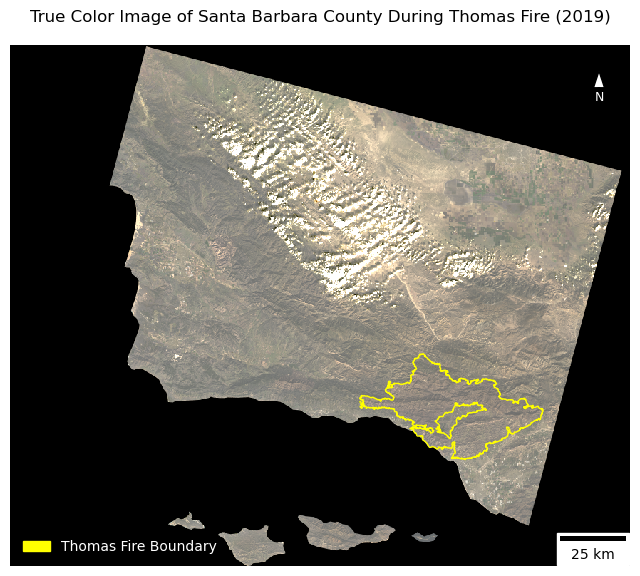

In [21]:
# Initialize a new 
fig, ax = plt.subplots(figsize = (8, 6*landsat_aspect_ratio))

ax.axis('off')

xr.Dataset(landsat[['red', 'green', 'blue']]).to_array().plot.imshow(robust = True)

ax.set_title('True Color Image of Santa Barbara County During Thomas Fire (2019)')

thomas_fire.plot(ax = ax,
                 color = 'none',
                edgecolor = 'yellow', 
                linewidth = 1)

scalebar = ScaleBar(1,  # Scale in units per pixel
                    units='m',  # Units of the scale bar ('m' for meters)
                    location='lower right',  # Position of the scale bar
                    scale_loc='bottom')  # Place the scale below the bar

# Add scalebar created above to plot
ax.add_artist(scalebar)

ax.legend(handles = [mpatches.Patch(color='yellow',
                          label='Thomas Fire Boundary')], 
          loc = "lower left",
          labelcolor = "white", 
          frameon=False)

# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.9),
            arrowprops=dict(facecolor='white', width=1, headwidth=8),
            ha='center', va='center', fontsize=9, color='white',
            xycoords='axes fraction')

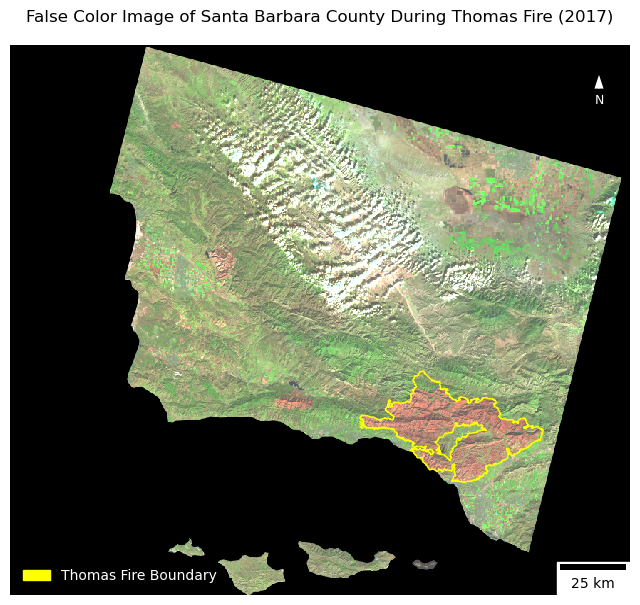

In [15]:
fig, ax = plt.subplots(figsize = (8, 6*landsat_aspect_ratio))

ax.axis('off')

thomas_fire.plot(ax = ax,
                 color = 'none',
                edgecolor = 'yellow', 
                linewidth = 1)

landsat[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, 
                                                           robust = True)

ax.set_title('False Color Image of Santa Barbara County During Thomas Fire (2017)')

scalebar = ScaleBar(1,  # Scale in units per pixel
                    units='m',  # Set units to meters
                    location='lower right', 
                    scale_loc='bottom')  

# Add scalebar created above to plot
ax.add_artist(scalebar)

ax.legend(handles = [mpatches.Patch(color='yellow',
                          label='Thomas Fire Boundary')], 
          loc = "lower left",
          labelcolor = "white", 
          frameon=False)

# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.9),
            arrowprops=dict(facecolor='white', width=1, headwidth=8),
            ha='center', va='center', fontsize=9, color='white',
            xycoords='axes fraction')

plt.show()

### Taking a closer look into Thomas Fire

Text(0.95, 0.9, 'N')

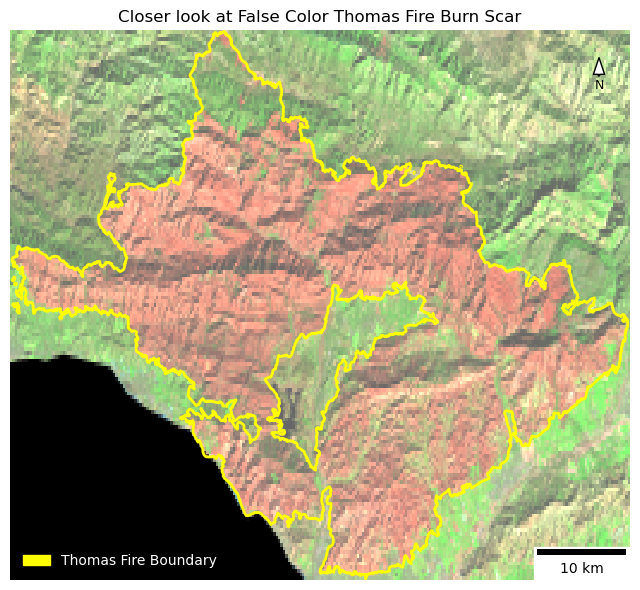

In [16]:
# Clip raster to AOI
landsat_small = landsat.rio.clip_box(*thomas_fire.total_bounds)

# Initialize plot
fig, ax = plt.subplots(figsize = (8, 6*landsat_aspect_ratio))

ax.axis('off')

thomas_fire.plot(ax = ax,
                 color = 'none',
                edgecolor = 'yellow', 
                linewidth = 2)

landsat_small[['swir22', 'nir08', 'red']].to_array().plot.imshow(ax = ax, 
                                                           robust = True)

ax.set_title('Closer look at False Color Thomas Fire Burn Scar')

scalebar = ScaleBar(1,  # Scale in units per pixel
                    units='m',  # Units of the scale bar ('m' for meters)
                    location='lower right',  # Position of the scale bar
                    scale_loc='bottom')  # Place the scale below the bar

# Add scalebar created above to plot
ax.add_artist(scalebar)

ax.legend(handles = [mpatches.Patch(color='yellow',
                          label='Thomas Fire Boundary')], 
          loc = "lower left",
          labelcolor = "white", 
          frameon=False)

# Add a north arrow
ax.annotate('N', xy=(0.95, 0.95), xytext=(0.95, 0.9),
            arrowprops=dict(facecolor='white', width=1, headwidth=8),
            ha='center', va='center', fontsize=9, color='black',
            xycoords='axes fraction')
